In [1]:
import matplotlib.pyplot as plt
import urllib

#World bank api lets you define per_page values and format as json.
url1 = "https://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN?per_page=60&format=json"
url2 = "https://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS?per_page=60&format=json"

res1 = urllib.request.urlopen(url1).read()
res2 = urllib.request.urlopen(url2).read()

In [2]:
import json
import numpy as np
import pandas as pd

dataGdp = json.loads(res1)
dataUem = json.loads(res2)


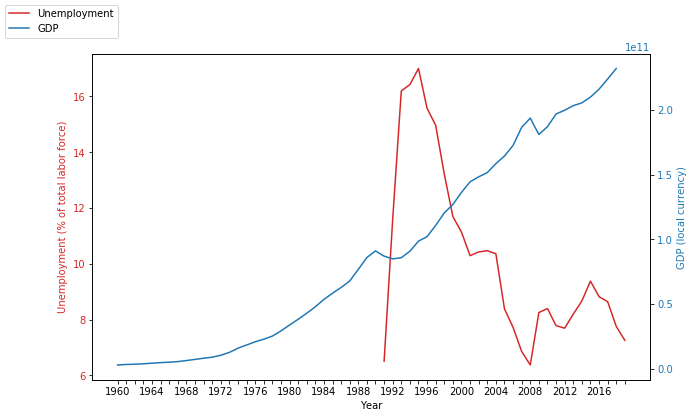

In [126]:
gdp = pd.DataFrame.from_records(dataGdp[1])
gdp.drop(["indicator","country","decimal"], axis=1, inplace=True)
gdp.columns = ["GDP", "Date"]

uem = pd.DataFrame.from_records(dataUem)
uem.drop(["indicator","country","decimal"], axis=1, inplace=True)
uem.columns = ["Unemployment", "Date"]

gdp_uem = pd.merge(left=gdp, right = uem, how="left", left_on="Date", right_on="Date")
gdp_uem.Unemployment=pd.to_numeric(gdp_uem.Unemployment)
gdp_uem.GDP=pd.to_numeric(gdp_uem.GDP)

gdp_uem = gdp_uem.iloc[::-1]

plt.rcParams["figure.figsize"] = [10, 6]
fig,ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Year")
ax1.set_ylabel("Unemployment (% of total labor force)", color=color)
ax1.plot(gdp_uem.Date, gdp_uem.Unemployment, color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("GDP (local currency)", color=color)
ax2.plot(gdp_uem.Date, gdp_uem.GDP, color=color)
ax2.tick_params(axis="y", labelcolor=color)
fig.legend(["Unemployment", "GDP"], loc=2)
for index, label in enumerate(ax1.xaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)
plt.show()


fig.savefig("unemployment_vs_gdp.pdf")

